In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cols = ['CODE','DURATION','COLOR','YEAR','DIRECTOR','RATING','COUNTRY_0','GENRES_0','GENRES_1','GENRES_2','LANGUAGE_0','KEYWORDS_0','KEYWORDS_1','KEYWORDS_2','WRITERS_0','CONTENT_RATING','KEYWORDS_DESCRIPTION','ACTOR_0','ACTOR_1','ACTOR_2','VOTES']

## Seleccionar el path a los datos 
#data = pd.read_csv('/content/drive/My Drive/TFM/data/tabular_prueba_5.csv',header=0,decimal=',',usecols=cols)
data = pd.read_csv("/content/drive/My Drive/Máster KSchool/TFM/data/imdb_data.csv",header=0, decimal=',',usecols=cols)
data['KEYWORDS_1'] = data['KEYWORDS_1'].astype(str)
data['KEYWORDS_2'] = data['KEYWORDS_2'].astype(str)
data['WRITERS_0'] = data['WRITERS_0'].astype(str)
data['CODE'] = data['CODE'].apply(lambda x: x.replace('tt',''))
data['RATING']  = data['RATING'].astype(float)
data['RATING_CAT'] = pd.cut(data['RATING'],  bins = [0,1,2,3,4,5,6,7,8,9,10], labels=['0','1','2','3','4','5','6','7','8','9'])
data.head(3)

,CODE,DURATION,COLOR,YEAR,DIRECTOR,RATING,CONTENT_RATING,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,COUNTRY_0,WRITERS_0,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,VOTES,RATING_CAT
0,4686108,106,Color,2017,JohnDoe,5.3,1,Drama,Musical,Drama,English,poetry,college,rap,USA,JaneDoe,azealia,PepitoDoe,PepitaDoe,JosefinaDoe,766,5
1,0445033,162,Color,2004,LawrenceRaghavendra,6.4,1,Action,Drama,Action,Telugu,mafia,friend,revenge,India,JaneDoe,friend,NagarjunaAkkineni,NagarjunaAkkineni,Raghuvaran,1000,6
2,1167599,85,Color,2009,MichaelHerbig,5.5,1,Action,Adventure,Comedy,German,hidinginabox,hidinginachest,vikingship,Germany,MichaelHerbig,viking,PepitoDoe,PepitaDoe,JosefinaDoe,2752,5


In [4]:
display(data[data['CODE']=='3280916'])

,CODE,DURATION,COLOR,YEAR,DIRECTOR,RATING,CONTENT_RATING,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,COUNTRY_0,WRITERS_0,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,VOTES,RATING_CAT
11987,3280916,83,Color,2015,JohnDoe,5.5,1,Horror,Horror,Horror,English,fakedocumentary,blackeyed,demonicpossession,USA,ChrisSparling,pennsylvania,PepitoDoe,PepitaDoe,JosefinaDoe,7911,5


In [9]:
#data.sort_values(by=['VOTES'])

## Votes Histogram 

In [10]:
votos = data[['CODE','VOTES']]
votos = votos.sort_values(by=['VOTES'])

In [21]:
votos.describe()

,VOTES
count,1.071810e+05
mean,6.654778e+03
std,4.426445e+04
min,5.000000e+00
25%,4.100000e+01
50%,1.720000e+02
75%,8.960000e+02
max,2.188495e+06


{'boxes': [<matplotlib.lines.Line2D at 0x7f0478cc6630>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0478cd9908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0478cf9e48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0478cd93c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0478ce60b8>,
  <matplotlib.lines.Line2D at 0x7f0478ce6940>]}

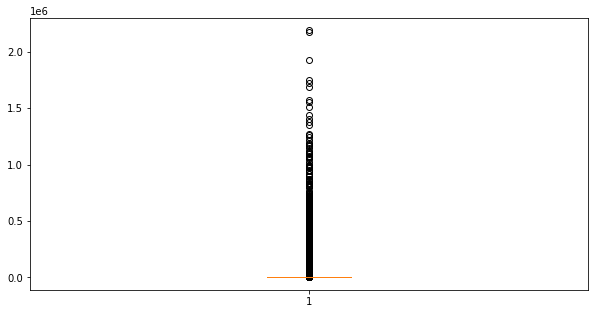

In [19]:
plt.figure(figsize=(10,5))
plt.boxplot(votos['VOTES'].values)

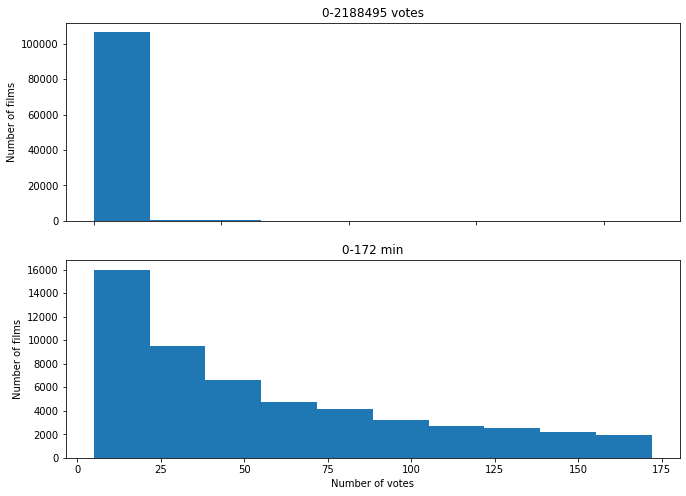

In [37]:
import numpy as np
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,figsize=(11,8))
axs[0].hist(x, bins=10, range=(x.min(), x.max()))
axs[0].set_title('0-2188495 votes')
axs[1].hist(x, bins=10, range=(x.min(), 172))
axs[1].set_title('0-172 min')


for ax in axs.flat:
    ax.set(xlabel='Number of votes', ylabel='Number of films')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Histogram with films per rating

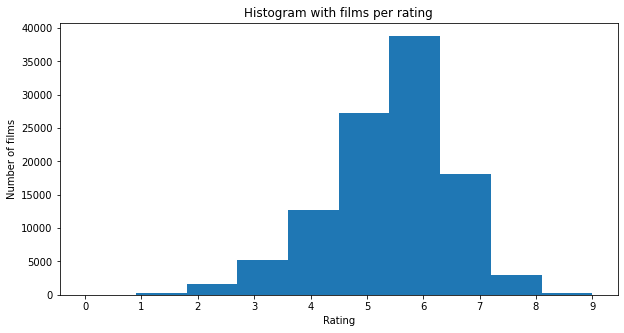

In [ ]:
x = data['RATING_CAT'].values
x= np.array(x)
x.sort()

# the histogram of the data
plt.figure(figsize=(10,5))
plt.hist(x, 10, density=False,rwidth=1)
plt.title("Histogram with films per rating")
plt.xlabel('Rating')
plt.ylabel('Number of films')

plt.show()

## Análisis de la variable color 

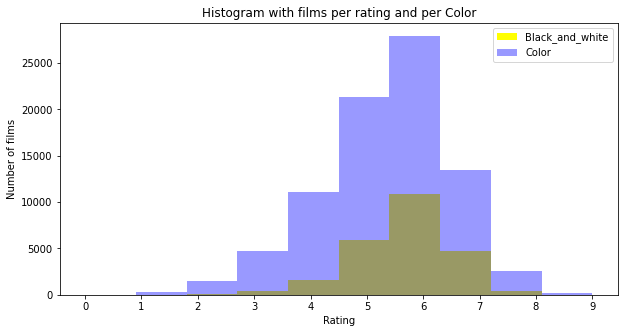

In [ ]:
blanck_and_white = data[data['COLOR']=='BlackandWhite']
Color = data[data['COLOR']=='Color']

x = blanck_and_white['RATING_CAT'].values
x= np.array(x)
x.sort()

y = Color['RATING_CAT'].values
y= np.array(y)
y.sort()

# the histogram of the data
plt.figure(figsize=(10,5))
plt.hist(x, 10,rwidth=1,alpha=1, facecolor='yellow', label='Black_and_white')
plt.hist(y, 10,rwidth=1,alpha=0.4, facecolor='blue', label='Color')
plt.legend(loc='upper right')
plt.xlabel('Rating')
plt.ylabel('Number of films')
plt.title("Histogram with films per rating and per Color")

plt.show()

## Histograma de peliculas hechas por año

Text(0.5, 1.0, 'Histogram with films per rating and per Color')

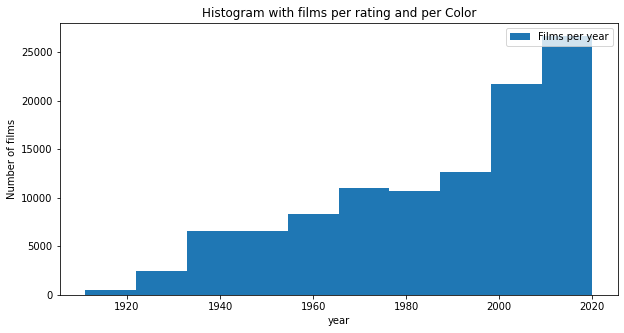

In [ ]:
x = data['YEAR'].values
x= np.array(x)
x.sort()

# the histogram of the data
plt.figure(figsize=(10,5))
plt.hist(x, 10,rwidth=1,alpha=1, label='Films per year')

plt.legend(loc='upper right')
plt.xlabel('year')
plt.ylabel('Number of films')
plt.title("Histogram with films per rating and per Color")

## Variable Duración

Histograma del rating de las películas en función de la duración de la película

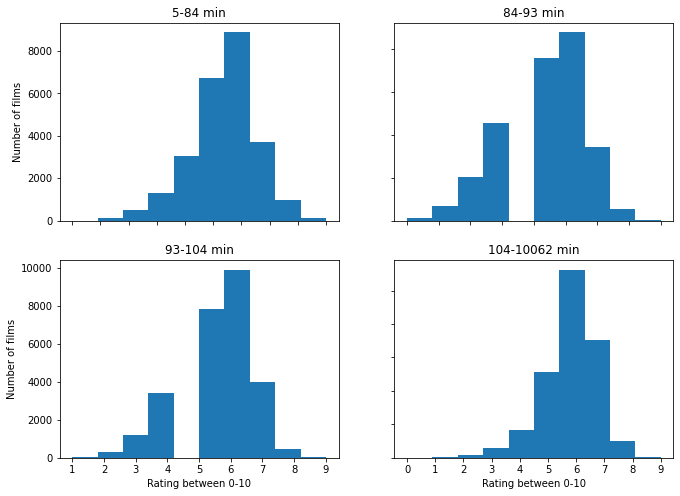

In [ ]:
q1 = data[(data['DURATION']>=5) & (data['DURATION']<84)]
q2 = data[(data['DURATION']>=84) & (data['DURATION']<93)]
q3 = data[(data['DURATION']>=93) & (data['DURATION']<104)]
q4 = data[(data['DURATION']>=104) & (data['DURATION']<10062)]

q1 = np.array(q1['RATING_CAT'].values)
q1.sort()
q2 = np.array(q2['RATING_CAT'].values)
q2.sort()
q3 = np.array(q3['RATING_CAT'].values)
q3.sort()
q4 = np.array(q4['RATING_CAT'].values)
q4.sort()

fig, axs = plt.subplots(2, 2,figsize=(11,8))
axs[0, 0].hist(q1, 10)
axs[0, 0].set_title('5-84 min')
axs[0, 1].hist(q2, 10,rwidth=1,alpha=1)
axs[0, 1].set_title('84-93 min')
axs[1, 0].hist(q3, 10)
axs[1, 0].set_title('93-104 min')
axs[1, 1].hist(q4, 10)
axs[1, 1].set_title('104-10062 min')

for ax in axs.flat:
    ax.set(xlabel='Rating between 0-10', ylabel='Number of films')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Análisis variable Director, Escritores, Generos, Actores

Categoría que más peliculas tiene por encima de una puntuación de x en proporción al total de películas que se han hecho.


In [ ]:
# Extrae el número de peliculas totales para cada valor de dicha categoría
def numero_total_peliculas(categoria,data):

  total = data.groupby(categoria).size().reset_index()
  total.columns=[categoria,'TOTAL']
  total = total.sort_values(['TOTAL'], ascending=[0])
  return total

# Extrae el número de peliculas totales para cada valor de dicha categoría por encima de la nota x
def numero_total_peliculas_mas_nota(categoria,nota,data):

  mas_nota = data[data['RATING']>nota]
  numero_total_pelis_mas_nota = mas_nota.groupby(categoria).size().reset_index()
  numero_total_pelis_mas_nota.columns=[categoria,'TOTAL_MAS_NOTA']
  numero_total_pelis_mas_nota = numero_total_pelis_mas_nota.sort_values(['TOTAL_MAS_NOTA'], ascending=[0])
  
  return numero_total_pelis_mas_nota

# Calcula la proporción de peliculas por encima de la nota
def merge_and_propor_mas_nota(total,total_mas_nota,ascendente):

  total_films_mas_nota = total_mas_nota.merge(total)

  total_films_mas_nota['Proporcion'] = (total_films_mas_nota['TOTAL_MAS_NOTA']/total_films_mas_nota['TOTAL'])*100
  total_films_mas_nota = total_films_mas_nota.sort_values(['Proporcion'], ascending=[ascendente])

  return total_films_mas_nota
  

In [ ]:
# DIRECTOR, COUNTRY_0, GENRES_0, LANGUAGE_0, KEYWORDS_0, WRITERS_0, CONTENT_RATING, YEAR, ACTOR_0, ACTOR_1
nota = 7
categoria = 'ACTOR_0'

# de menos a mas poner 1, de mas a menos poner 0
ascendente = 0

total = numero_total_peliculas(categoria,data)
total_mas_nota = numero_total_peliculas_mas_nota(categoria,nota,data)
total_films_mas_nota = merge_and_propor_mas_nota(total,total_mas_nota,ascendente)

In [ ]:
total_films_mas_nota.head(10)

,ACTOR_0,TOTAL_MAS_NOTA,TOTAL,Proporcion
645,ChishÃ»RyÃ»,4,4,100.0
492,GeraldinePage,4,4,100.0
646,BorisDvornik,4,4,100.0
617,MayumiTanaka,4,4,100.0
596,Asokan,4,4,100.0
587,NikolayCherkasov,4,4,100.0
563,SusanTaslimi,4,4,100.0
556,ShÃ»ichiIkeda,4,4,100.0
532,RaisulIslamAsad,4,4,100.0
517,FernandoFernánGómez,4,4,100.0


Para buscar un registro concreto

In [ ]:
total_films_mas_nota[total_films_mas_nota['ACTOR_0']=='AntonioBanderas']

,ACTOR_0,TOTAL_MAS_NOTA,TOTAL,Proporcion
935,AntonioBanderas,3,25,12.0


In [ ]:
data[data['ACTOR_0']=='MelGibson']

,CODE,DURATION,COLOR,YEAR,DIRECTOR,RATING,CONTENT_RATING,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,COUNTRY_0,WRITERS_0,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,VOTES,RATING_CAT
6658,1321860,91,Color,2011,JodieFoster,6.7,1,Drama,Drama,Drama,English,marriageproblems,depression,dysfunctionalfamily,USA,JaneDoe,communication,MelGibson,MelGibson,AntonYelchin,46.018,6
6679,6491178,159,Color,2018,JohnDoe,7.0,1,Action,Crime,Drama,English,barebreasts,pig,bacon,Canada,S.CraigZahler,force,MelGibson,MelGibson,JosefinaDoe,28.449,6
7192,0112573,178,Color,1995,MelGibson,8.3,3,Biography,Drama,History,English,scotland,revolt,england,USA,JaneDoe,william,MelGibson,MelGibson,PatrickMcGoohan,918.356,8
11515,0082432,110,Color,1981,PeterWeir,7.4,1,Adventure,Drama,History,English,automaticgunfire,gallipoli,anzac,Australia,DavidWilliamson,war,MelGibson,MelGibson,BillKerr,34.996,7
11685,1226273,117,Color,2010,MartinCampbell,6.6,2,Crime,Drama,Mystery,Latin,activist,fatherdaughterrelationship,conspiracytheory,UK,WilliamMonahan,thomas,MelGibson,MelGibson,DannyHuston,86.729,6
24384,3647498,88,Color,2016,Jean-FranÃƒÂ§oisRichet,6.4,2,Action,Crime,Drama,English,exconvict,fatherdaughterrelationship,ontherun,France,PeterCraig,wayward,MelGibson,MelGibson,JosefinaDoe,54.750,6
26839,0097733,114,Color,1989,RichardDonner,7.2,2,Action,Crime,Thriller,English,shoulder,holster,squadcar,USA,JeffreyBoam,murtaugh,MelGibson,MelGibson,JoePesci,154.071,7
27676,0099005,113,Color,1990,RogerSpottiswoode,5.8,1,Action,Comedy,War,English,pilot,cia,laos,USA,JaneDoe,laos,MelGibson,MelGibson,NancyTravis,25.942,5
28344,0110478,127,Color,1994,RichardDonner,7.0,2,Action,Adventure,Comedy,English,yosemitenationalpark,characternameastitle,playingcard,USA,RoyHuggins,maverick,MelGibson,MelGibson,JosefinaDoe,97.453,6
32758,0118883,135,Color,1997,RichardDonner,6.7,3,Action,Mystery,Thriller,English,bitingsomeone'snose,hospital,talkingwhiledriving,USA,BrianHelgeland,theories,MelGibson,MelGibson,PatrickStewart,89.976,6
